# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** MAHMUDA
- **Email:** mahmuda1004@gmail.com
- **ID Dicoding:** mahmuda_1004

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh hari libur dan hari kerja terhadap jumlah penyewaan sepeda?
- Pertanyaan 2: Apakah terdapat pola musiman dalam jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
# Membaca data dari file CSV
data = pd.read_csv('day.csv')


### Assessing Data

In [3]:
# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe())

# Menampilkan beberapa baris awal dari dataset
print("\nBeberapa Baris Awal:")
print(data.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Statistik Deskriptif:
          instant      season          yr     

### Cleaning Data

In [4]:
# Mengubah kolom 'dteday' menjadi tipe datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Menambahkan kolom 'month' dan 'year' untuk menyimpan bulan dan tahun
data['month'] = data['dteday'].dt.month
data['year'] = data['dteday'].dt.year


## Exploratory Data Analysis (EDA)

### Explore Distribution

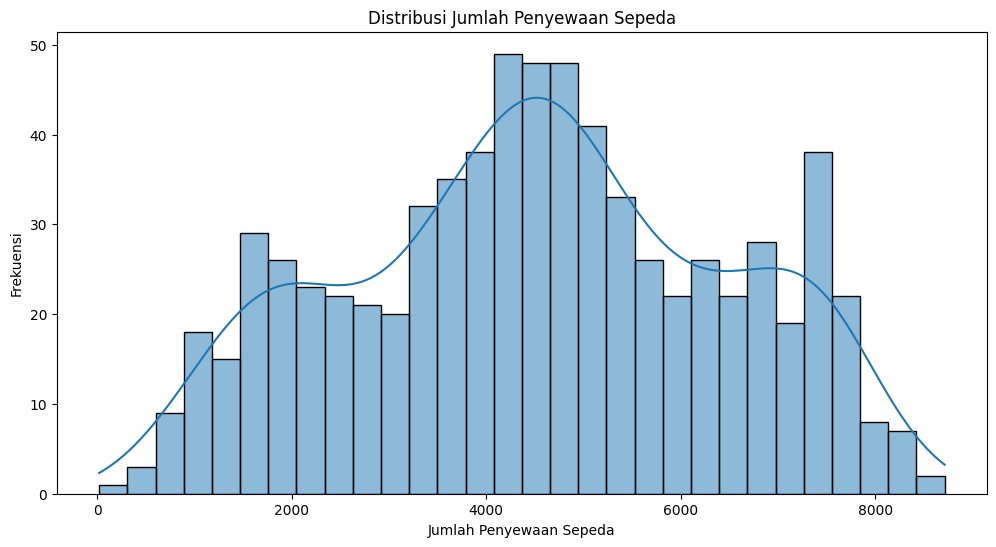

In [5]:
# Visualisasi distribusi jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.histplot(data['cnt'].dropna(), kde=True, bins=30)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()


## Explore Relationships

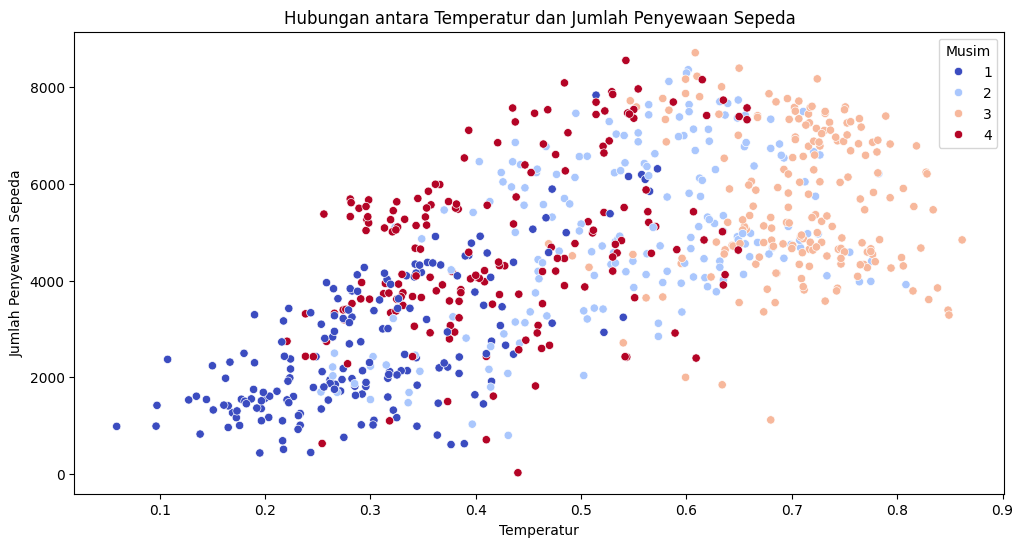

In [6]:
# Visualisasi hubungan antara temperatur dan jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temp', y='cnt', hue='season', palette='coolwarm')
plt.title('Hubungan antara Temperatur dan Jumlah Penyewaan Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Musim')
plt.show()


## Explore Correlations

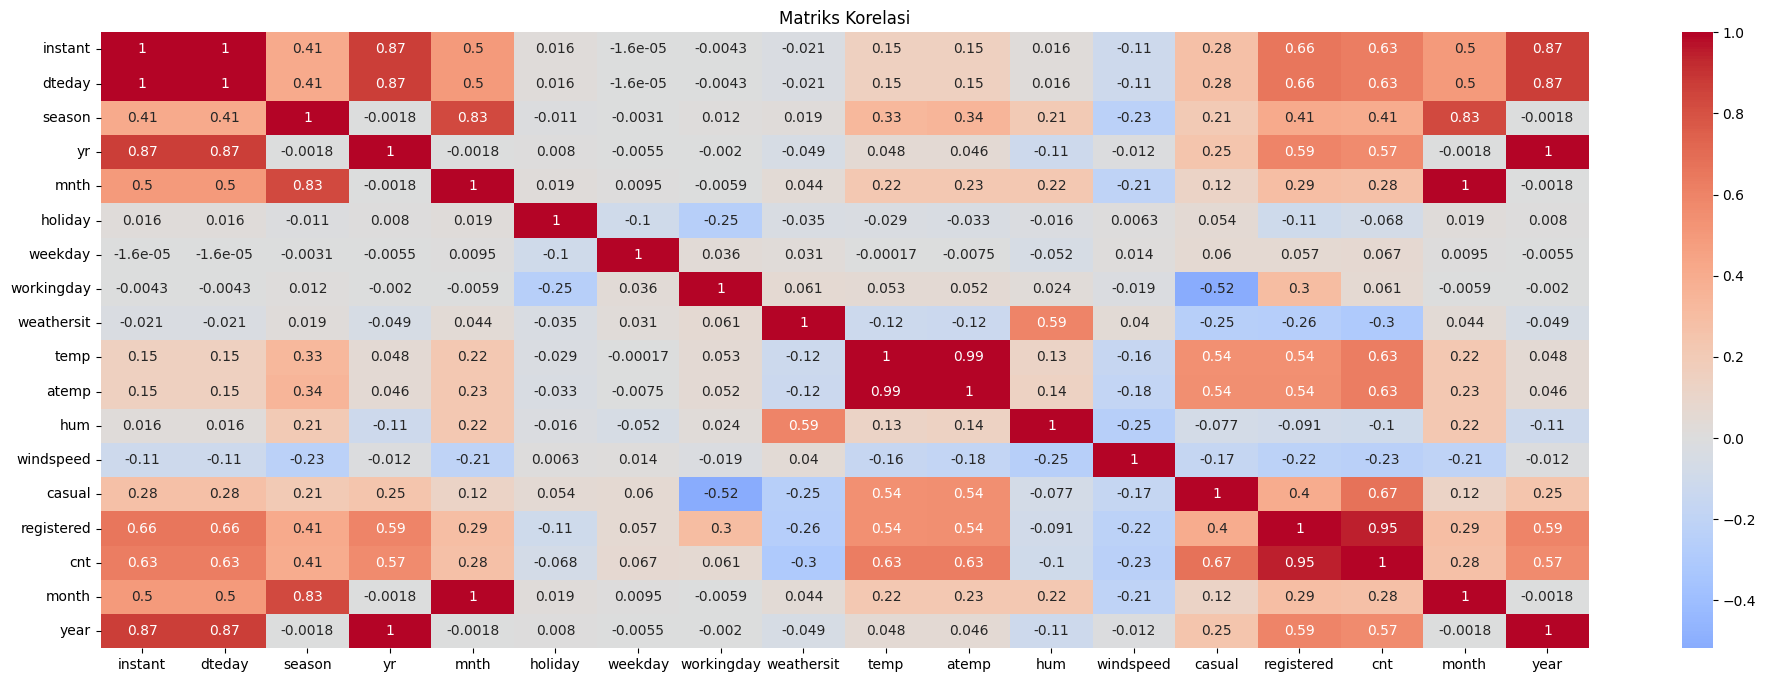

In [7]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(24, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:
#### Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda sepanjang tahun?

Jumlah penyewaan sepeda tertinggi pada hari libur: 13557
Jumlah penyewaan sepeda terendah pada hari libur: 2330
Jumlah penyewaan sepeda tertinggi pada hari non-libur: 351194
Jumlah penyewaan sepeda terendah pada hari non-libur: 129684


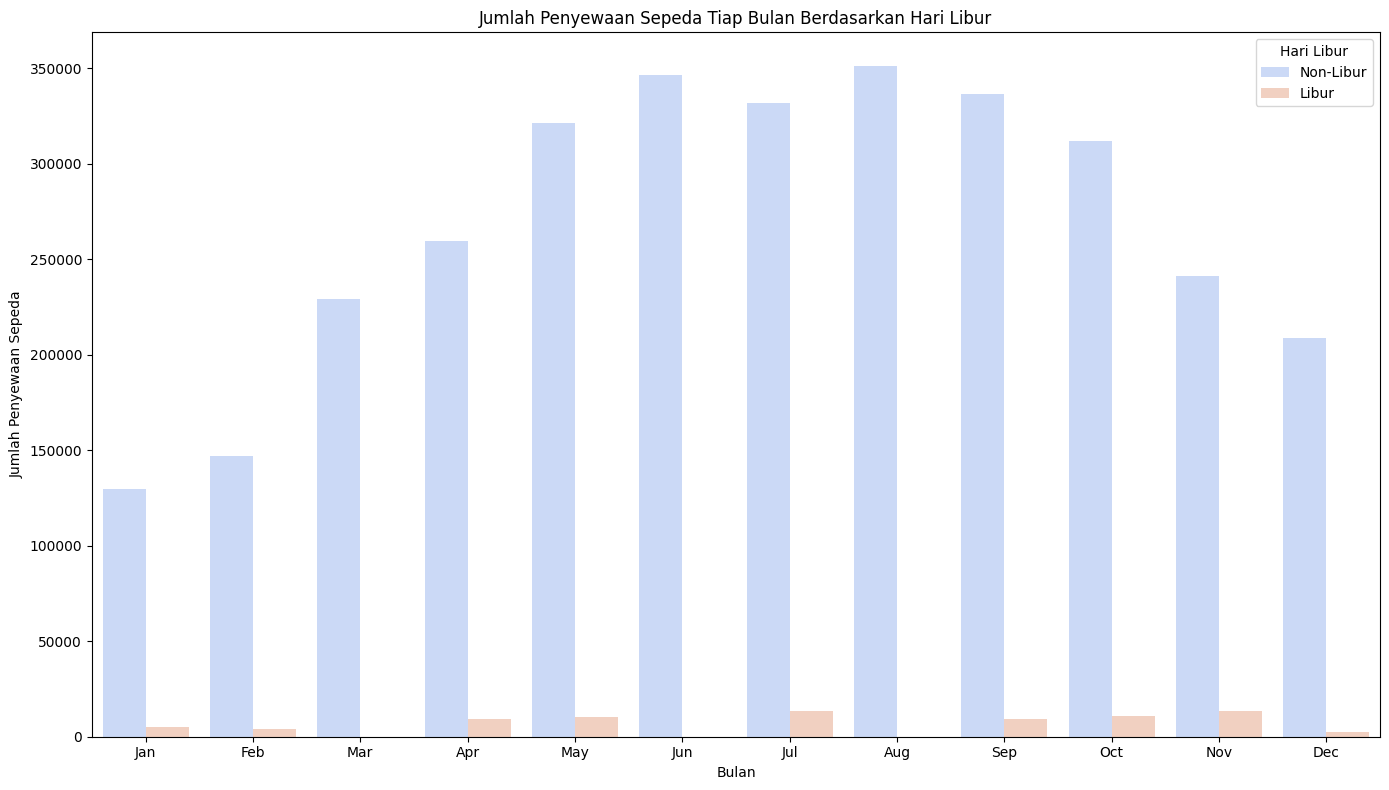

In [8]:
# Mengelompokkan data berdasarkan bulan, holiday, dan tipe pengguna
monthly_rentals = data.groupby(['month', 'holiday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Menentukan jumlah penyewaan tertinggi dan terendah berdasarkan hari libur dan non-libur
max_rentals_holiday = monthly_rentals[monthly_rentals['holiday'] == 1]['cnt'].max()
min_rentals_holiday = monthly_rentals[monthly_rentals['holiday'] == 1]['cnt'].min()
max_rentals_non_holiday = monthly_rentals[monthly_rentals['holiday'] == 0]['cnt'].max()
min_rentals_non_holiday = monthly_rentals[monthly_rentals['holiday'] == 0]['cnt'].min()

# Menampilkan informasi jumlah tertinggi dan terendah
print(f"Jumlah penyewaan sepeda tertinggi pada hari libur: {max_rentals_holiday}")
print(f"Jumlah penyewaan sepeda terendah pada hari libur: {min_rentals_holiday}")
print(f"Jumlah penyewaan sepeda tertinggi pada hari non-libur: {max_rentals_non_holiday}")
print(f"Jumlah penyewaan sepeda terendah pada hari non-libur: {min_rentals_non_holiday}")

# Mengatur ukuran figure
plt.figure(figsize=(14, 8))

# Plot total penyewaan per bulan untuk casual dan registered berdasarkan hari libur
sns.barplot(data=monthly_rentals, x='month', y='cnt', hue='holiday', palette='coolwarm', alpha=0.7, dodge=True, errorbar=None)

# Menambahkan judul dan label
plt.title('Jumlah Penyewaan Sepeda Tiap Bulan Berdasarkan Hari Libur')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Menambahkan legend secara manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Non-Libur', 'Libur'], title='Hari Libur')

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 2:
#### Apakah terdapat pola musiman dalam jumlah penyewaan sepeda?

Jumlah penyewaan sepeda tertinggi berdasarkan musim: 641479 (Musim: Fall)
Jumlah penyewaan sepeda terendah berdasarkan musim: 150000 (Musim: Spring)


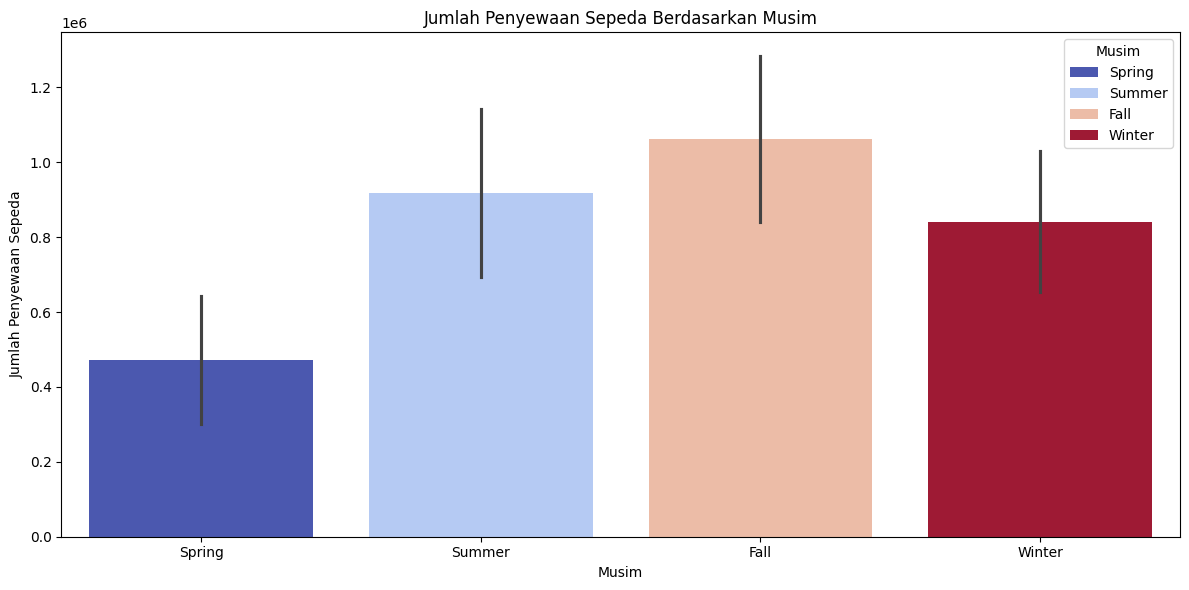

In [9]:
# Mengelompokkan data berdasarkan tahun dan musim
yearly_rentals_season = data.groupby(['yr', 'season']).agg({
    'cnt': 'sum'
}).reset_index()

# Menentukan jumlah penyewaan tertinggi dan terendah berdasarkan musim
max_rentals_season = yearly_rentals_season['cnt'].max()
min_rentals_season = yearly_rentals_season['cnt'].min()

# Menemukan musim dengan jumlah penyewaan tertinggi dan terendah
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
max_season = yearly_rentals_season.loc[yearly_rentals_season['cnt'].idxmax()]['season']
min_season = yearly_rentals_season.loc[yearly_rentals_season['cnt'].idxmin()]['season']

max_season_name = season_names[max_season]
min_season_name = season_names[min_season]

# Menampilkan informasi jumlah tertinggi dan terendah
print(f"Jumlah penyewaan sepeda tertinggi berdasarkan musim: {max_rentals_season} (Musim: {max_season_name})")
print(f"Jumlah penyewaan sepeda terendah berdasarkan musim: {min_rentals_season} (Musim: {min_season_name})")

# Visualisasi pengaruh musim per tahun
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_rentals_season, x='season', y='cnt', hue='season', palette='coolwarm', estimator='sum')

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])

# Menambahkan legend secara manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Spring', 'Summer', 'Fall', 'Winter'], title='Musim')

# Menampilkan plot
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1:
  
  Berdasarkan hasil analisis, jumlah penyewaan sepeda lebih tinggi pada hari non-libur dibandingkan dengan hari libur. Ini menunjukkan bahwa lebih banyak orang menyewa sepeda pada hari-hari kerja atau hari-hari biasa, sementara pada hari libur, jumlah penyewa cenderung menurun.

- Conclution pertanyaan 2:
  
  Dari hasil analisis musiman, terlihat bahwa jumlah penyewaan sepeda paling tinggi selama musim 'Fall'. Musim ini menunjukkan aktivitas penyewaan sepeda yang lebih banyak dibandingkan dengan musim lainnya, seperti 'Spring', 'Summer', dan 'Winter'.

In [10]:
!pip install pipreqs

In [11]:
pip freeze -> requirements.txt